# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Find out whether applicant's undergraduate GPA, GRE score and undergraduate school prestige will affect his or her chance of being admitted to UCLA graduate school

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: The dataset is a collection of 400 students' admission data, which consists of 2 numerical columns GPA and GRE and 1 categorical discreet column prestige. 3 rows with missing values are dropped. Overall admission rate is 31.75%. 

### Demo: Provide a table that explains the data by admission status

In [1]:
import os
import numpy as np
import pandas as pd

In [46]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))
df.dropna(inplace = True)

In [47]:
one_hot = pd.get_dummies(df['prestige'].astype('int'), prefix = 'prestige')
df = df.join(other=one_hot)

In [48]:
df['admission']=df['admit'].apply(lambda x: 'Admitted' if x==1 else 'Not Admitted')

In [49]:
df.admission.unique()

array(['Not Admitted', 'Admitted'], dtype=object)

## mean (std) by admission status

In [27]:
cols = [col for col in df.columns if col not in ['admit']]
df2 = df[cols]

In [28]:
df2.groupby(df2['admission']).mean().T

admission,Admitted,Not Admitted
gre,618.571429,573.579336
gpa,3.489206,3.347159
prestige_1,0.261905,0.103321
prestige_2,0.420635,0.350554
prestige_3,0.222222,0.343173
prestige_4,0.095238,0.202952


In [29]:
df2.groupby(df2['admission']).std().T

admission,Admitted,Not Admitted
gre,109.257233,116.052798
gpa,0.371655,0.376355
prestige_1,0.441426,0.304941
prestige_2,0.495632,0.478026
prestige_3,0.417399,0.475647
prestige_4,0.294715,0.402941


## counts and % by admission status

In [53]:
pd.crosstab(df.prestige.astype('int'),df.admission)

admission,Admitted,Not Admitted
prestige,,
1,33,28
2,53,95
3,28,93
4,12,55


In [52]:
pd.crosstab(df.prestige.astype('int'),df.admission,normalize='index')

admission,Admitted,Not Admitted
prestige,,
1,0.540984,0.459016
2,0.358108,0.641892
3,0.231405,0.768595
4,0.179104,0.820896


Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

### Methods: Write up the methods used in your analysis

Answer: Logistic regression using statsmodel and sklearn with l2 regularization showed similar estimates of coefficients and statistical significance. 

### Results: Write up your results

Answer:Students from high prestige undergraduate school with high GPA and GRE score has a larger chance getting admitted into UCLA graduate school.

### Visuals: Provide a table or visualization of these results

In [56]:
import statsmodels.api as sm
df['const'] = 1
model = sm.Logit(df['admit'], df[['gre','gpa','prestige_2','prestige_3','prestige_4','const']])
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Apr 2017   Pseudo R-squ.:                 0.08166
Time:                        21:20:36   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa            0.7793      0.

In [112]:
dat0=pd.DataFrame(data=result.params,columns=['statsmodel_coef'])
dat0['statsmodel_odds_ratio'] = dat0.statsmodel_coef.apply(np.exp)
dat0
# print(np.exp(result.params))

,statsmodel_coef,statsmodel_odds_ratio
gre,0.002218,1.002221
gpa,0.779337,2.180027
prestige_2,-0.680137,0.506548
prestige_3,-1.338677,0.262192
prestige_4,-1.553411,0.211525
const,-3.876854,0.020716


In [57]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(C = 10**2)
X = df[['gre','gpa','prestige_2','prestige_3','prestige_4']]
y = df['admit']
lm.fit(X,y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
print(lm.coef_)
print(lm.intercept_)
np.append(lm.coef_,lm.intercept_)

[[ 0.00215822  0.67315495 -0.62882239 -1.25222745 -1.56879212]]
[-3.51478687]


array([  2.15821543e-03,   6.73154955e-01,  -6.28822387e-01,
        -1.25222745e+00,  -1.56879212e+00,  -3.51478687e+00])

In [101]:
lm.intercept_[0]

-3.5147868723282198

In [113]:
dat = pd.DataFrame(data = lm.coef_, columns=X.columns)
dat = dat.T
dat.columns = ['sklearn_coef']
dat['sklearn_odds_ratio'] = dat.sklearn_coef.apply(np.exp)
dat

,sklearn_coef,sklearn_odds_ratio
gre,0.002158,1.002161
gpa,0.673155,1.960413
prestige_2,-0.628822,0.533219
prestige_3,-1.252227,0.285867
prestige_4,-1.568792,0.208297


In [114]:
dat3=dat0.join(dat)

In [117]:
dat3

,statsmodel_coef,statsmodel_odds_ratio,sklearn_coef,sklearn_odds_ratio
gre,0.002218,1.002221,0.002158,1.002161
gpa,0.779337,2.180027,0.673155,1.960413
prestige_2,-0.680137,0.506548,-0.628822,0.533219
prestige_3,-1.338677,0.262192,-1.252227,0.285867
prestige_4,-1.553411,0.211525,-1.568792,0.208297
const,-3.876854,0.020716,NaN,NaN


In [120]:
dat3.ix['const','sklearn_coef']=lm.intercept_[0]
dat3.ix['const','sklearn_odds_ratio']=np.exp(lm.intercept_[0])

## Comparison of coefficient/odds ratio estimates for statsmodel Vs. scklearn

In [121]:
dat3

,statsmodel_coef,statsmodel_odds_ratio,sklearn_coef,sklearn_odds_ratio
gre,0.002218,1.002221,0.002158,1.002161
gpa,0.779337,2.180027,0.673155,1.960413
prestige_2,-0.680137,0.506548,-0.628822,0.533219
prestige_3,-1.338677,0.262192,-1.252227,0.285867
prestige_4,-1.553411,0.211525,-1.568792,0.208297
const,-3.876854,0.020716,-3.514787,0.029754


<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

In [133]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

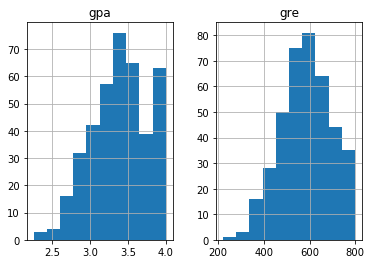

In [136]:
df[['gpa','gre']].hist()
pl.show()

Answer: No cross validation were done in fitting statsmodel and sklearn logistic regression models which may create overfitting problem. 3 rows with NAs were dropped out without missing value imputation. Since it is only 0.75% of the whole development dataset, it should not impact the overall result significantly. There are many other algorithms such as decision tree, support vector machine, neural networks and other ensemble methods like stochastic gradient classification and random forest can be trained on this dataset, some of which may provide better overall accuracy in prediction.